In [1]:
# import neccesary libraries

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Download the data

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-25 14:26:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  148K 0s
    50K .......... ..........                                 100% 7.46M=0.3s

2020-07-25 14:26:24 (208 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
# Reading the data

df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE', 
          'CYLINDERS', 
          'FUELCONSUMPTION_COMB', 
          'CO2EMISSIONS']]

cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


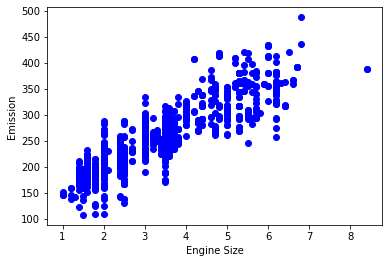

In [5]:
# Plot emission values

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')

plt.xlabel('Engine Size')
plt.ylabel('Emission')

plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

## Polynomial Regression

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. 

Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values?

Well, we can create a few additional features: 1, $x$, and $x^2$.

`PolynomialFeatures()` function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

`fit_transform()` takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = \beta_0 + \beta_1  x_1 + \beta_2 x_2$

Now, we can deal with it as 'linear regression' problem. 

Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. 

In [8]:
# Using linear regression

clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

print("Intercept: ", clf.intercept_)
print("Coefficient: ", clf.coef_)

Intercept:  [107.36266796]
Coefficient:  [[ 0.         50.91821479 -1.5947519 ]]


Text(0, 0.5, 'Emission')

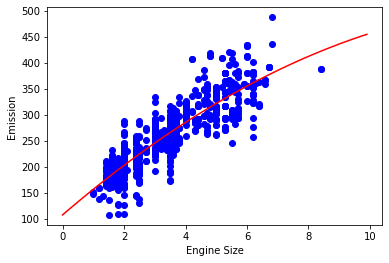

In [10]:
#Plotting the model

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2] * np.power(xx, 2)

plt.plot(xx, yy, '-r')

plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [12]:
# Evaluation

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual Sum of Squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2_score: %.2f" % r2_score(test_y_hat, test_y))

Mean Absolute Error (MAE): 23.76
Residual Sum of Squares (MSE): 939.78
R2_score: 0.69
